importing dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

data collection & processing

In [2]:
# loading the data from csv file to a pandas DataFrame
sales_data = pd.read_csv('/content/drive/MyDrive/forecast data/sales.csv')

In [3]:
# to print the first 5 rows
sales_data.head()

,InvoiceNo,InvoiceDate,Location,CustomerCode,CustomerName,SubTotal,DiscountAmount,OtherCharge,VATAmount,TAXAmount,Total
0,18118,11 Oct 2023,R&D Center,738,M/S Jafar Alam,12600.0,0.0,0,0,0,12600.0
1,18114,11 Oct 2023,Gumti,922,M/S Tasfia Enterprise (Kaduti Bazar),42300.0,7191.0,0,0,0,35109.0
2,18115,11 Oct 2023,Gumti,744,M/S Bismillah Biz Vandar,39480.0,6711.6,0,0,0,32768.4
3,18116,11 Oct 2023,Tista,291,M/S Chowdhurani Feed Corner,49500.0,10500.0,0,0,0,39000.0
4,18117,11 Oct 2023,Rupsha,905,M/S Mitali Cheeks,2700.0,459.0,0,0,0,2241.0


In [4]:
sales_data.shape

(16304, 11)

In [5]:
sales_details_data = pd.read_csv('/content/drive/MyDrive/forecast data/sales_details.csv')

In [7]:
sales_details_data.head()

,InvoiceNo,InvoiceDate,Location,CustomerCode,CustomerName,ItemCategory,ItemCode,Item,Unit,Weight,BatchNo,CostPrice,SaleBonusQty,SaleActualQty,TotalSaleQuantity,SalePrice,Sale Amount
0,18342,25-Oct-23,Karnaphuli,820,M/S Nurzahan Enterprises,Aqua Product,105,Ammonia Test Kit,pcs,26.5 gm,FT-101,800,0,1,1,2950.0,2950.0
1,18325,25-Oct-23,Turag,286,M/S Rodela Enterprise,Aqua Product,15,Biocult 02kg,pcs,2000 gm,1355,430,0,2,2,990.0,1980.0
2,18325,25-Oct-23,Turag,286,M/S Rodela Enterprise,Aqua Product,15,Biocult 02kg,pcs,2000 gm,1387,430,0,3,3,990.0,2970.0
3,18330,25-Oct-23,Kopotakkho,17,M/S Lucky Fish,Aqua Product,15,Biocult 02kg,pcs,2000 gm,1387,430,4,40,44,990.0,39600.0
4,18323,25-Oct-23,Surma,505,M/S Arafat Enterprise,Aqua Product,202,Clean 100ml,ml,100 ml,P07-10-23,250,1,20,21,940.0,18800.0


In [8]:
sales_details_data.shape

(30392, 17)

In [ ]:
sales_return_data = pd.read_csv('/content/drive/MyDrive/forecast data/sales_return_details.csv')

In [ ]:
sales_return_data.shape

(434, 18)

In [ ]:
sales_return_data.head()

,SR=SaleReturn,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,NaN,InvoiceNo,InvoiceDate,Location,CustomerCode,CustomerName,ItemCategory,ItemCode,Item,Unit,Weight,BatchNo,CostPrice,SR_BonusQty,SR_ActualQty,SR_TotalQty,SR_Price,SR_Amount
1,NaN,18050,19-Oct-23,Corporate,439,Growtech Aquaculture (Teknaf),Shrimp Feed,83,Titan -3B (25kg),pcs,25000 gm,61023,2750,0,2,2,4200,8400
2,NaN,18050,19-Oct-23,Corporate,439,Growtech Aquaculture (Teknaf),Shrimp Feed,82,Titan-3A (25kg),pcs,25000 gm,41023,2750,0,3,3,4200,12600
3,NaN,18161,18-Oct-23,Corporate,439,Growtech Aquaculture (Teknaf),Aqua Product,33,Growcal 25kg,pcs,25000 gm,03/YBM-FNL/22,500,0,2,2,1095,2190
4,NaN,18050,18-Oct-23,Corporate,439,Growtech Aquaculture (Teknaf),Shrimp Feed,83,Titan -3B (25kg),pcs,25000 gm,61023,2750,0,2,2,4200,8400


In [ ]:
sales_return_data.shape

(434, 18)

In [ ]:
item_movement_data = pd.read_csv('/content/drive/MyDrive/forecast data/Item_movement.csv')

In [ ]:
item_movement_data.head()

,Location,ItemCategory,ItemCode,Item,Unit,BatchNo,Flag,InvoiceDate,CostPrice,SalePrice,InvoiceNo
0,Brahmaputra,Aqua Product,12,Algaenill 01ltr,pcs,26112101,Sale,09 Mar 2022,267,600.0,1993
1,Brahmaputra,Aqua Product,12,Algaenill 01ltr,pcs,26112101,Sale,18 Jan 2022,267,600.0,311
2,Brahmaputra,Aqua Product,209,Antistress 500gm,pcs,P220550,Sale,02 Mar 2023,369,825.0,12387
3,Brahmaputra,Aqua Product,209,Antistress 500gm,pcs,P220550,Sale,02 May 2023,369,825.0,13909
4,Brahmaputra,Aqua Product,209,Antistress 500gm,pcs,P220550,Sale,03 Mar 2023,369,825.0,12427


In [ ]:
item_movement_data.shape

(30873, 11)

In [ ]:
customer_data = pd.read_csv('/content/drive/MyDrive/forecast data/customer_info.csv')

In [ ]:
customer_data.head()

,Code,Name,BirthDate,AgeInYear,IsMarried,Average/Invoice,Address
0,336,M/S Adib Traders,08 Feb 1987,36,YES,26586.07,"Kesorhat, Mohonpur, Rajshahi"
1,471,M/S Kowshik Traders,01 Sep 1980,43,NO,13664.63,"Sahibazar, Gurudashpur, Natore"
2,359,M/S Krishi Sangrokkhon Store,15 Aug 1971,52,NO,101378.81,"Bhawbanigonj, Bagmara, Rajshahi"
3,401,M/S Nawab Fish Farm,12 Dec 1980,43,NO,22420.42,"Atahar, Chapainawabgonj Sadar"
4,416,M/S Sayeed Traders,12 Dec 1985,38,NO,163928.00,"Nawhata, Paba, Rajshahi"


checking number of rows and columns

In [ ]:
customer_data.shape

(1075, 7)

getting more info about salesdetails dataset

In [ ]:
sales_details_data.head()

,InvoiceNo,InvoiceDate,Location,CustomerCode,CustomerName,ItemCategory,ItemCode,Item,Unit,Weight,BatchNo,CostPrice,SaleBonusQty,SaleActualQty,TotalSaleQuantity,SalePrice,Sale Amount
0,18342,25-Oct-23,Karnaphuli,820,M/S Nurzahan Enterprises,Aqua Product,105,Ammonia Test Kit,pcs,26.5 gm,FT-101,800,0,1,1,2950.0,2950.0
1,18325,25-Oct-23,Turag,286,M/S Rodela Enterprise,Aqua Product,15,Biocult 02kg,pcs,2000 gm,1355,430,0,2,2,990.0,1980.0
2,18325,25-Oct-23,Turag,286,M/S Rodela Enterprise,Aqua Product,15,Biocult 02kg,pcs,2000 gm,1387,430,0,3,3,990.0,2970.0
3,18330,25-Oct-23,Kopotakkho,17,M/S Lucky Fish,Aqua Product,15,Biocult 02kg,pcs,2000 gm,1387,430,4,40,44,990.0,39600.0
4,18323,25-Oct-23,Surma,505,M/S Arafat Enterprise,Aqua Product,202,Clean 100ml,ml,100 ml,P07-10-23,250,1,20,21,940.0,18800.0


In [ ]:
sales_details_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30392 entries, 0 to 30391
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          30392 non-null  int64  
 1   InvoiceDate        30392 non-null  object 
 2   Location           30392 non-null  object 
 3   CustomerCode       30392 non-null  int64  
 4   CustomerName       30392 non-null  object 
 5   ItemCategory       30392 non-null  object 
 6   ItemCode           30392 non-null  int64  
 7   Item               30392 non-null  object 
 8   Unit               30392 non-null  object 
 9   Weight             30258 non-null  object 
 10  BatchNo            30392 non-null  object 
 11  CostPrice          30392 non-null  int64  
 12  SaleBonusQty       30392 non-null  int64  
 13  SaleActualQty      30392 non-null  int64  
 14  TotalSaleQuantity  30392 non-null  int64  
 15  SalePrice          30392 non-null  float64
 16  Sale Amount        303

checking for missing values

In [ ]:
sales_details_data.isnull().sum()

InvoiceNo              0
InvoiceDate            0
Location               0
CustomerCode           0
CustomerName           0
ItemCategory           0
ItemCode               0
Item                   0
Unit                   0
Weight               134
BatchNo                0
CostPrice              0
SaleBonusQty           0
SaleActualQty          0
TotalSaleQuantity      0
SalePrice              0
Sale Amount            0
dtype: int64

In [9]:
new_sales_details_data = pd.read_csv('/content/drive/MyDrive/forecast data/sales_details.csv')

In [10]:
new_sales_details_data.shape

(30392, 17)

In [11]:
new_sales_details_data.isnull().sum()

InvoiceNo              0
InvoiceDate            0
Location               0
CustomerCode           0
CustomerName           0
ItemCategory           0
ItemCode               0
Item                   0
Unit                   0
Weight               134
BatchNo                0
CostPrice              0
SaleBonusQty           0
SaleActualQty          0
TotalSaleQuantity      0
SalePrice              0
Sale Amount            0
dtype: int64

dropna(n = not a= available) function in which any means any missing value will be removed

In [12]:
new_sales_details_data = new_sales_details_data.dropna(how='any')

In [13]:
new_sales_details_data.isnull().sum()

InvoiceNo            0
InvoiceDate          0
Location             0
CustomerCode         0
CustomerName         0
ItemCategory         0
ItemCode             0
Item                 0
Unit                 0
Weight               0
BatchNo              0
CostPrice            0
SaleBonusQty         0
SaleActualQty        0
TotalSaleQuantity    0
SalePrice            0
Sale Amount          0
dtype: int64

In [14]:
new_sales_details_data.shape

(30258, 17)

data analysis - statistical measures of the data(min ,maxta ,percentale value)

In [15]:
new_sales_details_data.describe()

,InvoiceNo,CustomerCode,ItemCode,CostPrice,SaleBonusQty,SaleActualQty,TotalSaleQuantity,SalePrice,Sale Amount
count,30258.000000,30258.000000,30258.000000,30258.000000,30258.000000,30258.000000,30258.000000,30258.000000,3.025800e+04
mean,9117.612797,383.422368,55.572873,464.378016,2.763831,40.772556,43.536387,1160.999703,3.440717e+04
std,5398.183212,281.407395,46.346663,695.796668,10.544962,100.495748,108.785901,1289.793032,8.788317e+04
min,1.000000,1.000000,12.000000,0.000000,0.000000,0.000000,1.000000,121.000000,0.000000e+00
25%,4353.250000,151.000000,25.000000,177.000000,0.000000,7.000000,8.000000,480.000000,5.500000e+03
50%,9264.500000,327.000000,46.000000,241.000000,1.000000,20.000000,21.000000,825.000000,1.396000e+04
75%,13727.000000,572.000000,58.000000,375.000000,3.000000,50.000000,50.000000,1230.000000,3.203000e+04
max,18342.000000,1089.000000,222.000000,5170.000000,1000.000000,6571.000000,7571.000000,15000.000000,3.260000e+06


In [16]:
new_sales_details_data.dtypes

InvoiceNo              int64
InvoiceDate           object
Location              object
CustomerCode           int64
CustomerName          object
ItemCategory          object
ItemCode               int64
Item                  object
Unit                  object
Weight                object
BatchNo               object
CostPrice              int64
SaleBonusQty           int64
SaleActualQty          int64
TotalSaleQuantity      int64
SalePrice            float64
Sale Amount          float64
dtype: object

label  encoding

In [17]:
new_sales_details_data['ItemCategory'].value_counts()

Aqua Product    28491
Shrimp Feed      1280
Fish Feed         487
Name: ItemCategory, dtype: int64

In [20]:
label_encoder_1 = LabelEncoder()

In [21]:
Label_new_sales_details_data = label_encoder_1.fit_transform(new_sales_details_data.ItemCategory)

column is target where new data is stored

In [22]:
new_sales_details_data['target'] = Label_new_sales_details_data

In [24]:
new_sales_details_data.head()

,InvoiceNo,InvoiceDate,Location,CustomerCode,CustomerName,ItemCategory,ItemCode,Item,Unit,Weight,BatchNo,CostPrice,SaleBonusQty,SaleActualQty,TotalSaleQuantity,SalePrice,Sale Amount,target
0,18342,25-Oct-23,Karnaphuli,820,M/S Nurzahan Enterprises,Aqua Product,105,Ammonia Test Kit,pcs,26.5 gm,FT-101,800,0,1,1,2950.0,2950.0,0
1,18325,25-Oct-23,Turag,286,M/S Rodela Enterprise,Aqua Product,15,Biocult 02kg,pcs,2000 gm,1355,430,0,2,2,990.0,1980.0,0
2,18325,25-Oct-23,Turag,286,M/S Rodela Enterprise,Aqua Product,15,Biocult 02kg,pcs,2000 gm,1387,430,0,3,3,990.0,2970.0,0
3,18330,25-Oct-23,Kopotakkho,17,M/S Lucky Fish,Aqua Product,15,Biocult 02kg,pcs,2000 gm,1387,430,4,40,44,990.0,39600.0,0
4,18323,25-Oct-23,Surma,505,M/S Arafat Enterprise,Aqua Product,202,Clean 100ml,ml,100 ml,P07-10-23,250,1,20,21,940.0,18800.0,0


In [23]:
new_sales_details_data['target'].value_counts()

0    28491
2     1280
1      487
Name: target, dtype: int64

In [25]:
sns.set()

<ipython-input-26-9a61a12c6ca6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_sales_details_data['ItemCode'])


<Axes: xlabel='ItemCode', ylabel='Density'>

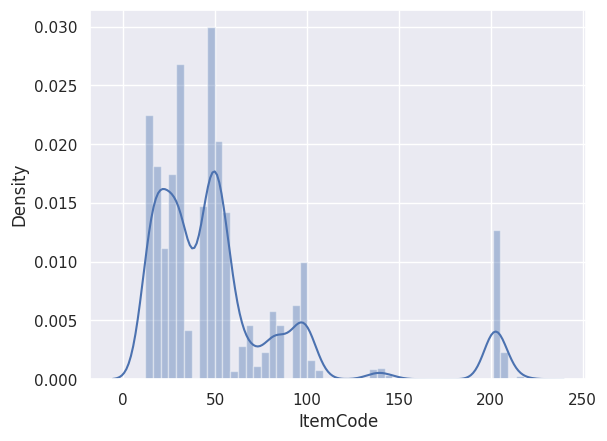

In [26]:
sns.distplot(new_sales_details_data['ItemCode'])

<ipython-input-27-914332536961>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_sales_details_data['CustomerCode'])


<Axes: xlabel='CustomerCode', ylabel='Density'>

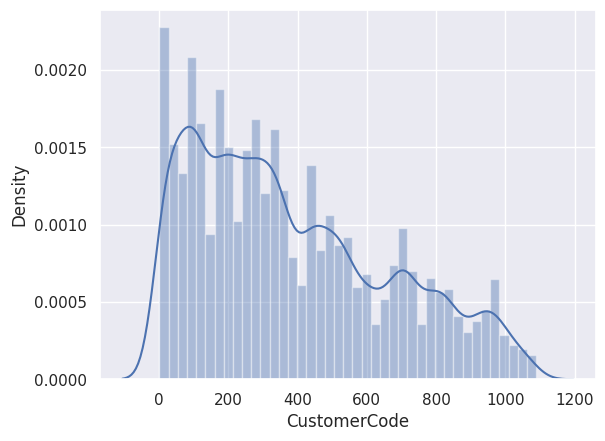

In [27]:
sns.distplot(new_sales_details_data['CustomerCode'])

In [28]:
sns.distplot(customer_data['Average/Invoice'])

NameError: ignored

In [32]:
sns.distplot(customer_data['Average/Invoice'])

NameError: ignored

<ipython-input-29-1d96d0c33fe4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_sales_details_data['Sale Amount'])


<Axes: xlabel='Sale Amount', ylabel='Density'>

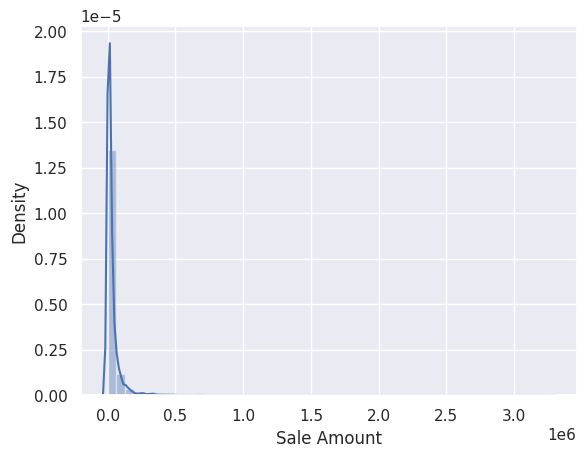

In [29]:
sns.distplot(new_sales_details_data['Sale Amount'])

co relation understanding by heatmap

In [33]:
correlation = new_sales_details_data.corr()

<ipython-input-33-53b0b85afd26>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = new_sales_details_data.corr()


cbar- color bar ,10 ,10 is the size of graph

<Axes: >

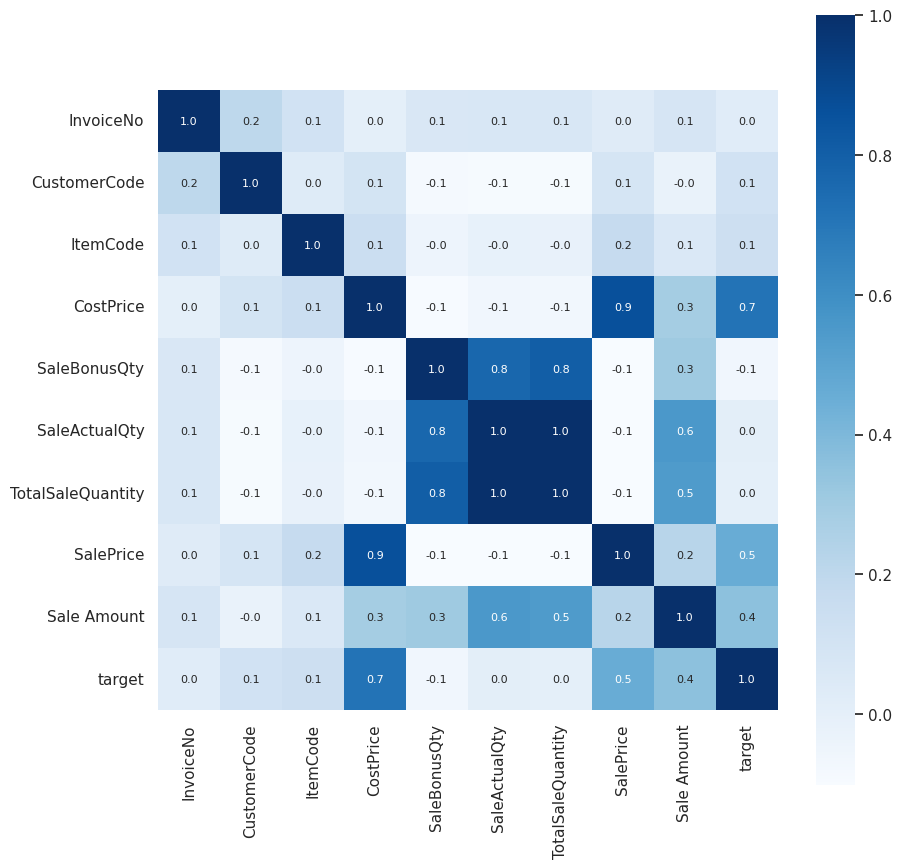

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True, square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [38]:
new_sales_details_data.replace({"ItemCategory":{'Aqua Product':0,'Shrimp Feed':1,'Fish Feed':2}},inplace=True)

In [39]:
new_sales_details_data.head()

,InvoiceNo,InvoiceDate,Location,CustomerCode,CustomerName,ItemCategory,ItemCode,Item,Unit,Weight,BatchNo,CostPrice,SaleBonusQty,SaleActualQty,TotalSaleQuantity,SalePrice,Sale Amount,target
0,18342,25-Oct-23,Karnaphuli,820,M/S Nurzahan Enterprises,0,105,Ammonia Test Kit,pcs,26.5 gm,FT-101,800,0,1,1,2950.0,2950.0,0
1,18325,25-Oct-23,Turag,286,M/S Rodela Enterprise,0,15,Biocult 02kg,pcs,2000 gm,1355,430,0,2,2,990.0,1980.0,0
2,18325,25-Oct-23,Turag,286,M/S Rodela Enterprise,0,15,Biocult 02kg,pcs,2000 gm,1387,430,0,3,3,990.0,2970.0,0
3,18330,25-Oct-23,Kopotakkho,17,M/S Lucky Fish,0,15,Biocult 02kg,pcs,2000 gm,1387,430,4,40,44,990.0,39600.0,0
4,18323,25-Oct-23,Surma,505,M/S Arafat Enterprise,0,202,Clean 100ml,ml,100 ml,P07-10-23,250,1,20,21,940.0,18800.0,0


In [41]:
plt.style.use('bmh')

In [44]:
x=sales_details_data['ItemCategory']
y=sales_details_data['Sale Amount']

<BarContainer object of 30392 artists>

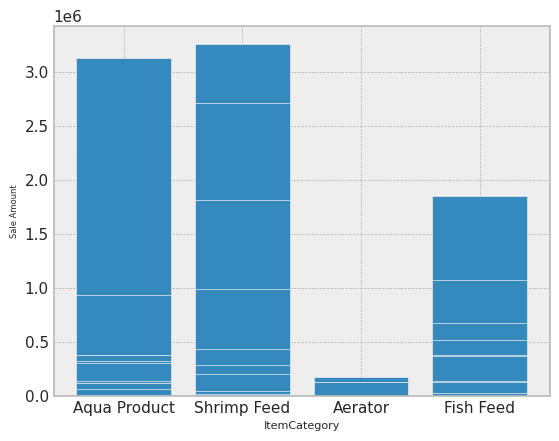

In [47]:
plt.xlabel('ItemCategory',fontsize= 8)
plt.ylabel('Sale Amount',fontsize = 6)
plt.bar(x,y)

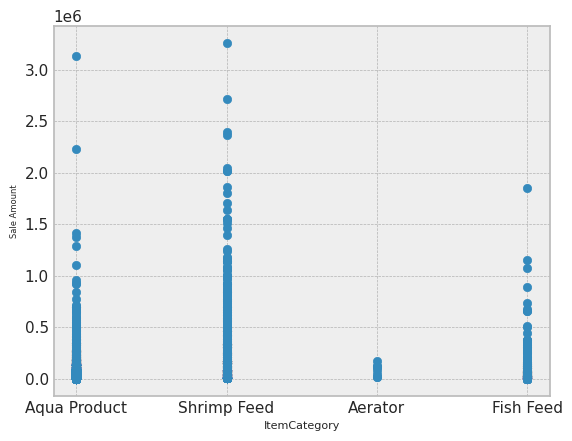

In [55]:
plt.xlabel('ItemCategory',fontsize =8)
plt.ylabel('Sale Amount',fontsize=6)
plt.scatter(x,y)
#plt.plot(x,y)